# Working with Julia
This part of the Julia workshop involves some practical aspects of working with Julia. It also contains some code blocks where you can try out working with Julia yourself. For this notebook, we will be loading a dataset from a CSV file and visualizing the results. In this part, we will only work with `DataFrames.jl`, `CSV.jl` and `Plots.jl`. The end of this notebook also contains a (nonexhaustive) list of possible packages that can be very helpful when working with data in Julia. 

## Loading our Packages
We will first load the packages we will require for this notebook. Note that we could have also written this as 
```
using DataFrames, CSV, Plots
```

In [1]:
using DataFrames
using CSV
using Plots

## Reading Data from a CSV File

![Crab](../figures/crab.jpg)

In this part, we are going to read an example dataset on crabs. The dataset should be included in the repository under `../datasets/CrabAge.csv`. The dataset is taken from Kaggle <sup>1</sup>.
We can load the data using the DataFrames and CSV packages as follows:


In [5]:
location = "../datasets/CrabAge.csv"
dataset = DataFrame(CSV.File(location))

# show the first five lines of the dataset
first(dataset, 5)

Row,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,F,1.4375,1.175,0.4125,24.6357,12.332,5.58485,6.74718,9
2,M,0.8875,0.65,0.2125,5.40058,2.29631,1.37495,1.55922,6
3,I,1.0375,0.775,0.25,7.95203,3.23184,1.60175,2.76408,6
4,F,1.175,0.8875,0.25,13.4802,4.74854,2.28213,5.24466,10
5,I,0.8875,0.6625,0.2125,6.9031,3.45864,1.48835,1.70097,6


We can see that we have 9 columns with different features. Now we may wish to display this. We can index specific columns using Symbols, and select a single column using `dataframe[!, column]` where `column` is a Symbol type depicting the column name. In names with spaces, you can use a String to specify the name, and add `:` to the front to make it a Symbol, as shown below.

In [10]:
# length of each crab
crablength = dataset[!, :Length]

# weight of each crab
crabweight = dataset[!, :Weight]

# shucked weight of each crab
crabshuckedweight = dataset[!, :"Shucked Weight"];

We can now make some simple plots, such as a scatterplot of crab length and crab weight.

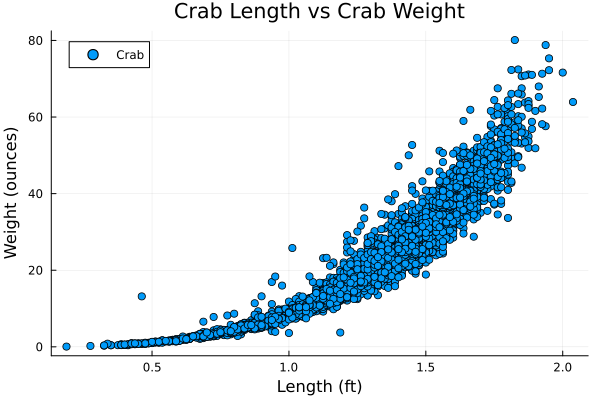

In [17]:
scatter(crablength, crabweight, xlabel="Length (ft)", ylabel="Weight (ounces)", label="Crab")
title!("Crab Length vs Crab Weight")

The plots library has many capabilities, but is not the most extensive library for plotting in Julia. However, we can still do quite a lot with it. Using some filters, we can color by sex. We first determine the different categories that we have.

In [18]:
categories = unique(dataset[!,:Sex])

3-element Vector{String1}:
 "F"
 "M"
 "I"

We see that we have three categories: "Female", "Male" and "Indeterminate". Now, let's plot each category in one figure. We also improve the style of the figure slightly.

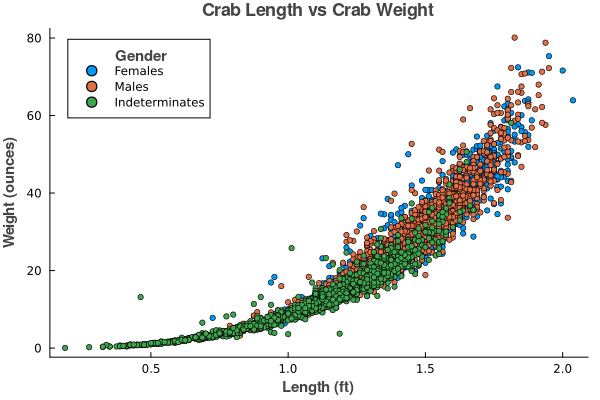

In [60]:
# create an empty plot
fig = plot(;xlabel="Length (ft)", ylabel="Weight (ounces)")

# filter out each category
females = dataset[dataset.Sex .== "F", :]
males = dataset[dataset.Sex .== "M",:]
indeterminates = dataset[dataset.Sex .== "I", :];

# add scatters to the figure for each category
scatter!(fig, females[!, :Length], females[!, :Weight], label="Females", markersize=3, markerstrokewidth=0.8)
scatter!(fig, males[!, :Length], males[!, :Weight], label="Males",  markersize=3, markerstrokewidth=0.8)
scatter!(fig, indeterminates[!, :Length], indeterminates[!, :Weight], label="Indeterminates",  markersize=3, markerstrokewidth=0.8)
title!("Crab Length vs Crab Weight")

# plot the figure (not strictly necessary, but useful for specifying other options)
plot(fig, grid=false, background=false, titlefontfamily= "Helvetica Bold", titlefontsize=12, guidefontsize=10, guidefontfamily="Helvetica Bold", 
legendtitle="Gender", legendtitlefontsize=10, legendfontsize=8, legendtitlefontfamily="Helvetica Bold")

## References
1. [Gursewak Singh Sidhu. (2021). <i>Crab Age Prediction</i> [Data set]. Kaggle](10.34740/kaggle/dsv/2834512)